**Objective:**  
The aim of this project is to analyze the purchasing patterns and customer feedback in a retail dataset. The analysis will focus on customer demographics, product categories, brands, and purchasing behavior to draw insights into preferences and trends. The data will be visualized using various types of graphs.

**Data Cleaning**  
Let's proceed with cleaning the data by checking for:  

1. Missing values  
2. Duplicates  
3. Outliers  

In [3]:
import pandas as pd

# Loading the CSV file
file_path = "E:/python practice/cleaned.csv"
data = pd.read_csv(file_path)

# Show basic information about the data (first 5 rows and general info)
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45166 entries, 0 to 45165
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    45166 non-null  int64 
 1   user_id    45166 non-null  int64 
 2   rating     45166 non-null  int64 
 3   timestamp  45166 non-null  int64 
 4   gender     45166 non-null  object
 5   category   45166 non-null  object
 6   brand      45166 non-null  object
 7   year       45166 non-null  int64 
 8   month      45166 non-null  int64 
 9   quantity   45166 non-null  int64 
 10  unitprice  45166 non-null  int64 
 11  amount     45166 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.1+ MB


(None,
    item_id  user_id  rating  timestamp  gender    category    brand  year  \
 0        7      131       4      36692  Female  Home Audio  Philips  2000   
 1       19      231       5      36891  Female      Camera    Canon  2000   
 2       14      233       5      36893  Female      Camera    Kodak  2001   
 3       14      257       5      36926  Female      Camera    Kodak  2001   
 4       14      269       5      36952  Female      Camera    Kodak  2001   
 
    month  quantity  unitprice  amount  
 0      6         5       6360   31800  
 1     12        10       9955   99550  
 2      1         9       7639   68751  
 3      2         7       5097   35679  
 4      3        10       6472   64720  )

In [6]:
# Check for missing values
print("Missing Values in each column:")
print(data.isnull().sum())

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Descriptive statistics for numerical columns to identify outliers
numeric_summary = data.describe()

numeric_summary

Missing Values in each column:
item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
brand        0
year         0
month        0
quantity     0
unitprice    0
amount       0
dtype: int64

Number of duplicate rows: 0


,item_id,user_id,rating,timestamp,year,month,quantity,unitprice,amount
count,45166.000000,4.516600e+04,45166.000000,45166.000000,45166.000000,45166.000000,45166.000000,45166.000000,45166.000000
mean,3455.669574,4.846225e+05,4.218594,42077.370743,2014.710136,6.387902,7.490878,7491.027587,56118.889032
std,2485.219357,3.302487e+05,1.221118,816.969504,2.264562,3.598405,1.707673,1441.977833,16924.053525
min,1.000000,2.800000e+01,1.000000,36692.000000,2000.000000,1.000000,5.000000,5000.000000,25000.000000
25%,1518.000000,1.969772e+05,4.000000,41802.000000,2014.000000,3.000000,6.000000,6239.000000,43098.250000
50%,2881.000000,4.410355e+05,5.000000,42219.000000,2015.000000,6.000000,7.000000,7480.000000,54243.000000
75%,5178.000000,7.579805e+05,5.000000,42594.000000,2016.000000,10.000000,9.000000,8735.000000,67760.000000
max,9551.000000,1.157632e+06,5.000000,43374.000000,2018.000000,12.000000,10.000000,10000.000000,100000.000000


**Data Cleaning Observations:**  
1. There are no missing values in the dataset.  
2. No duplicate rows exist.  
3. No extreme outliers in the key variables like quantity, unitprice, and amount, although further analysis will confirm this.  

**Data Analysis Using Visualization**  
We will analyze the following:  
1. Distribution of product categories.  
2. Brand-wise sales.  
3. Rating analysis.  
4. Monthly purchasing trends.  

C:\Users\User\AppData\Local\Temp\ipykernel_9632\1462337583.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='category', palette='Set2')


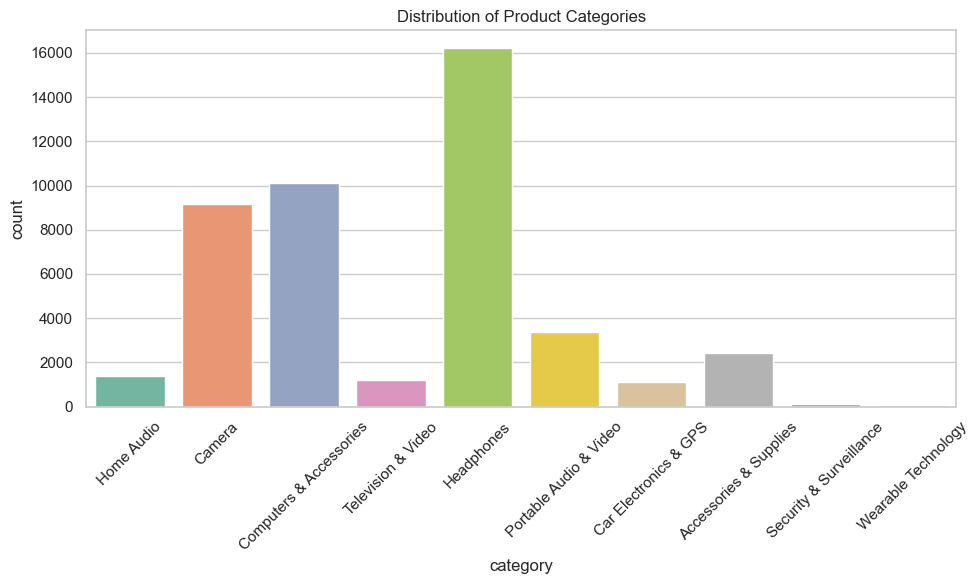

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Distribution of Product Categories
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='category', palette='Set2')
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Distribution of Product Categories:** There is a clear dominance of certain product categories, with some being significantly more popular than others.

C:\Users\User\AppData\Local\Temp\ipykernel_9632\2091909840.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_sales.index, y=brand_sales.values, palette='muted')


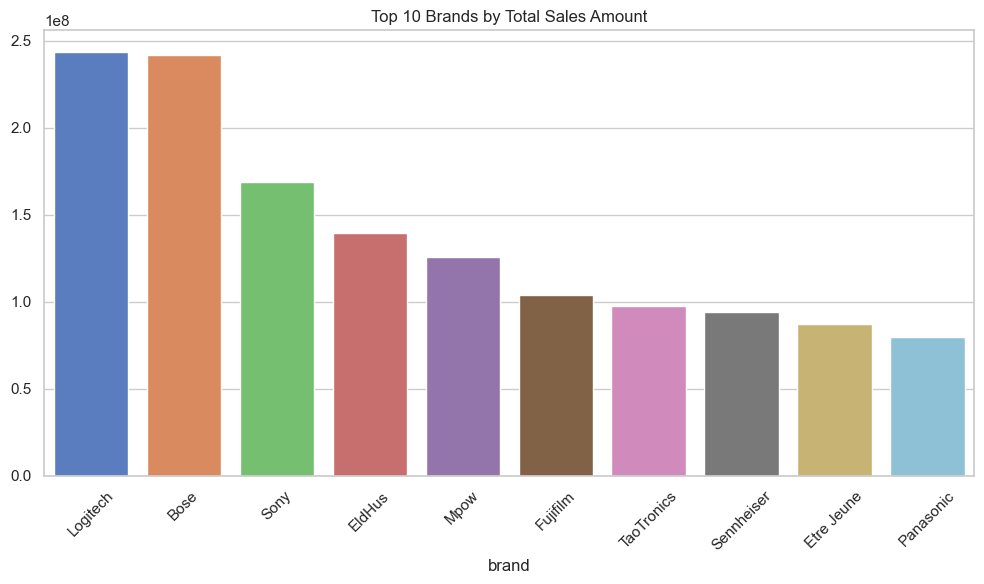

In [8]:
# 2. Brand-wise Sales (using sum of amount)
plt.figure(figsize=(10,6))
brand_sales = data.groupby('brand')['amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=brand_sales.index, y=brand_sales.values, palette='muted')
plt.title('Top 10 Brands by Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Brand-wise Sales:** The top 10 brands contribute the most to the total sales amount, with a steep difference between the highest and lowest brands in this group.

C:\Users\User\AppData\Local\Temp\ipykernel_9632\2823745756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='rating', palette='Set1')


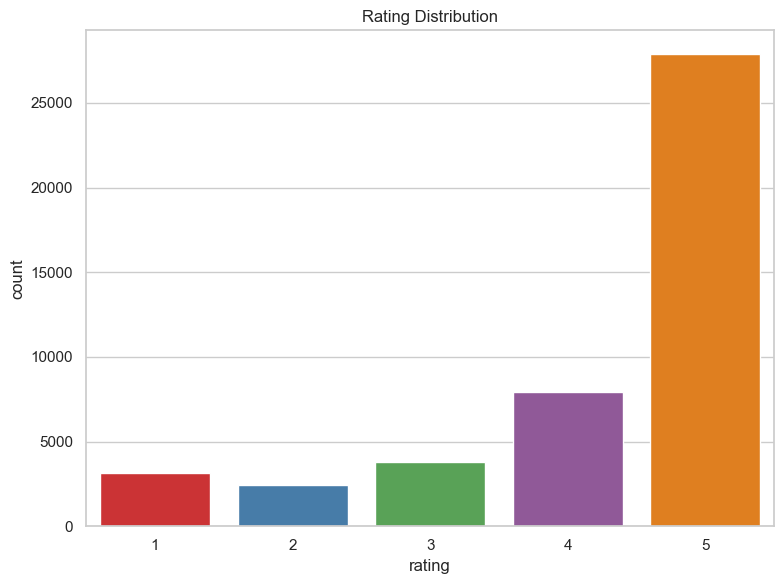

In [9]:
# 3. Rating Distribution
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='rating', palette='Set1')
plt.title('Rating Distribution')
plt.tight_layout()
plt.show()

**Rating Distribution:** Ratings of 4 and 5 dominate the dataset, suggesting customer satisfaction is generally high.

C:\Users\User\AppData\Local\Temp\ipykernel_9632\553137044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='month', palette='Set3')


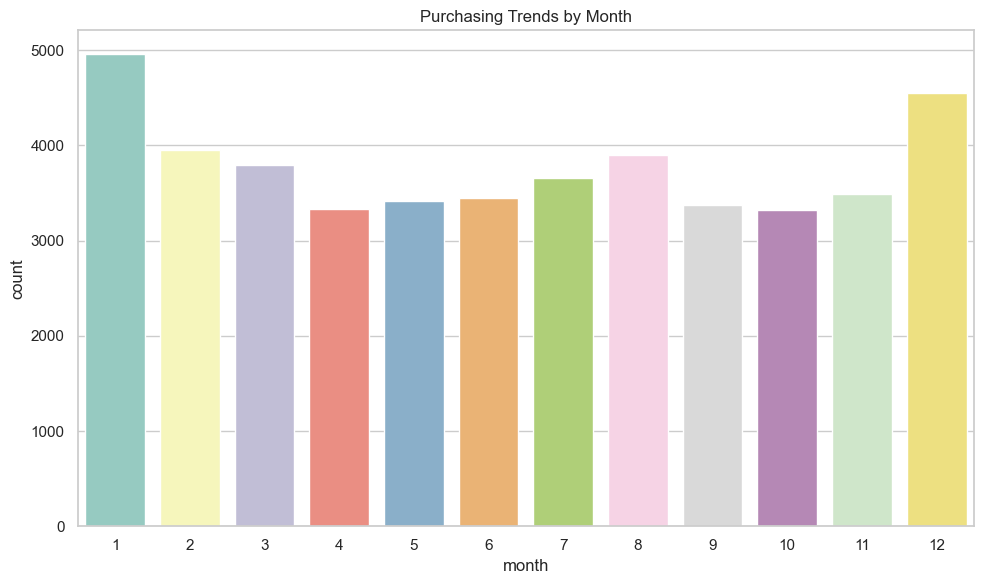

In [10]:
# 4. Monthly Purchasing Trends
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='month', palette='Set3')
plt.title('Purchasing Trends by Month')
plt.tight_layout()
plt.show()

**Monthly Purchasing Trends:** Sales are distributed relatively evenly across months, with some spikes indicating potential seasonality or promotional periods.

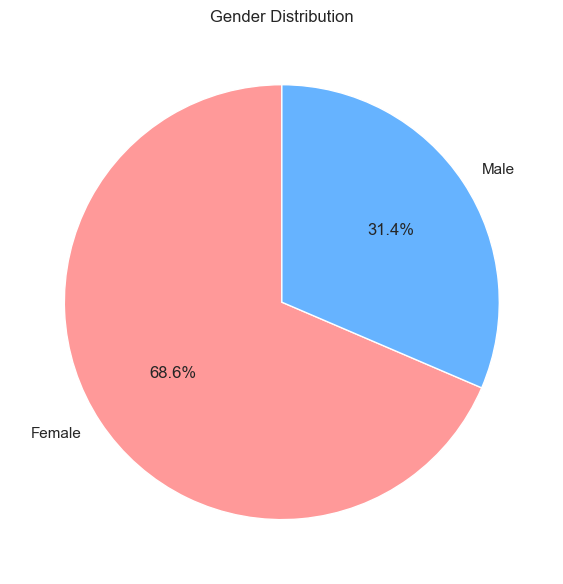

In [12]:
# 5. Pie Chart: Gender distribution
plt.figure(figsize=(6, 6))
gender_count = data['gender'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

**Gender Distribution:** The pie chart displays the proportion of male and female customers. If one gender dominates, it might indicate a specific target demographic, or that marketing efforts need to be adjusted to engage the other gender.

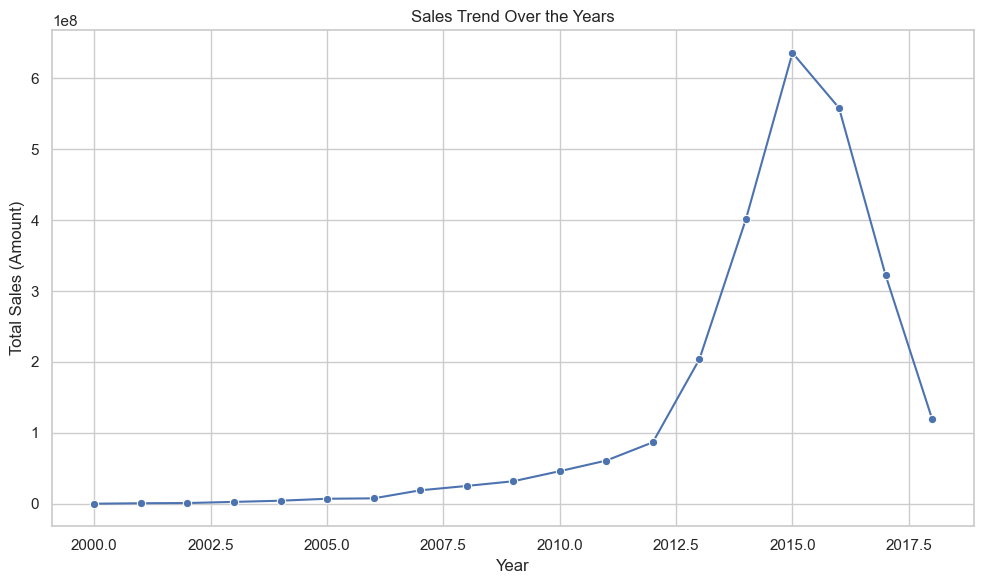

In [13]:
# 6. Line Chart: Sales trend over years
plt.figure(figsize=(10, 6))
yearly_sales = data.groupby('year')['amount'].sum()
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o')
plt.title('Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (Amount)')
plt.tight_layout()
plt.show()

**Sales Trend:** The line chart highlights sales trends over time, based on the total sales amount each year. A rising trend indicates business growth, while dips suggest periods that may need further investigation.

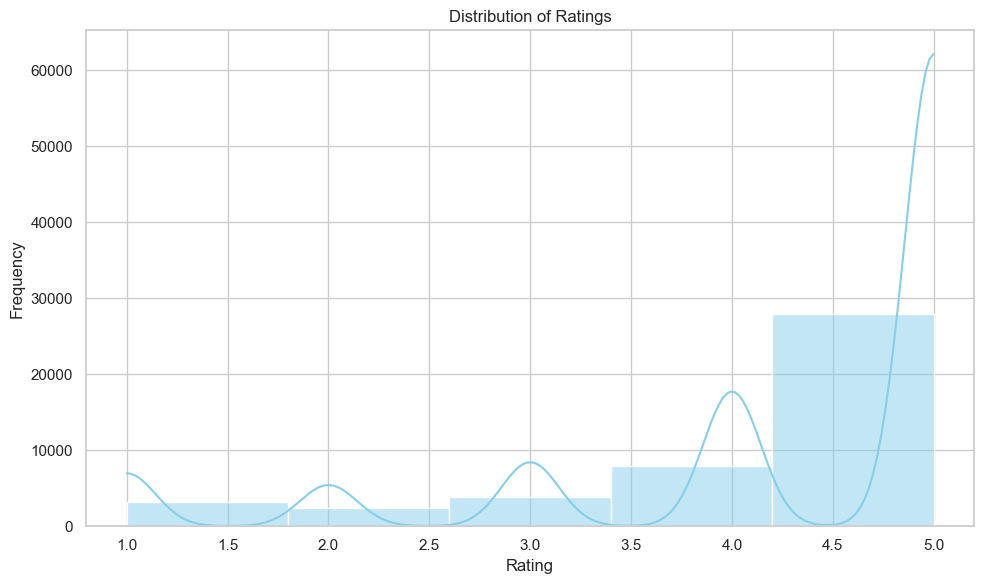

In [14]:
# 7. Histogram: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Distribution of Ratings:** The histogram shows how ratings are distributed. If most ratings are clustered around 4 or 5, it suggests that customers are generally satisfied. A more balanced distribution might indicate a need for improving product quality or service.

<Figure size 1200x700 with 0 Axes>

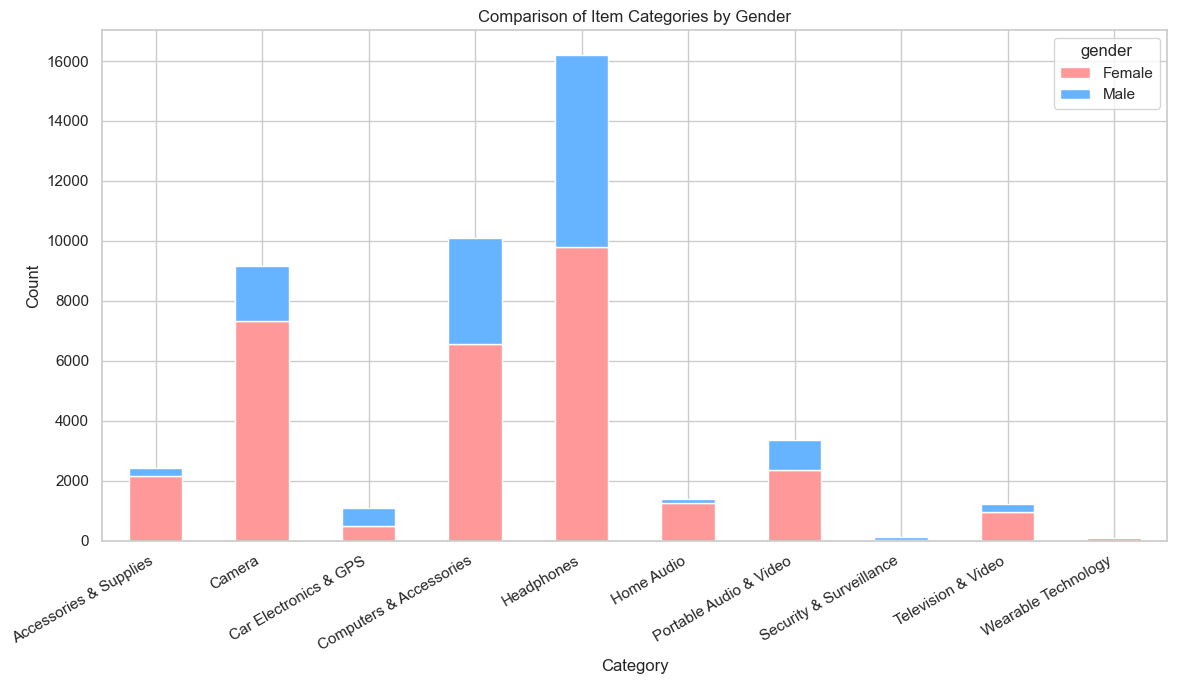

In [19]:
# 8. Stacked Bar Chart: Comparison of categories across genders

plt.figure(figsize=(12, 7)) 
category_gender = data.groupby(['category', 'gender']).size().unstack()

# Create the stacked bar chart
category_gender.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], figsize=(12, 7))

# Title and labels
plt.title('Comparison of Item Categories by Gender')
plt.xlabel('Category')
plt.ylabel('Count')

# Adjust x-axis label rotation and alignment
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels by 30 degrees and align to the right

# Adjust layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()


**Comparison of Item Categories by Gender:** This chart shows how product categories differ in popularity between male and female customers. For example, if women prefer "Camera" while men lean towards "Home Audio", it can guide product development and marketing campaigns tailored for each gender.

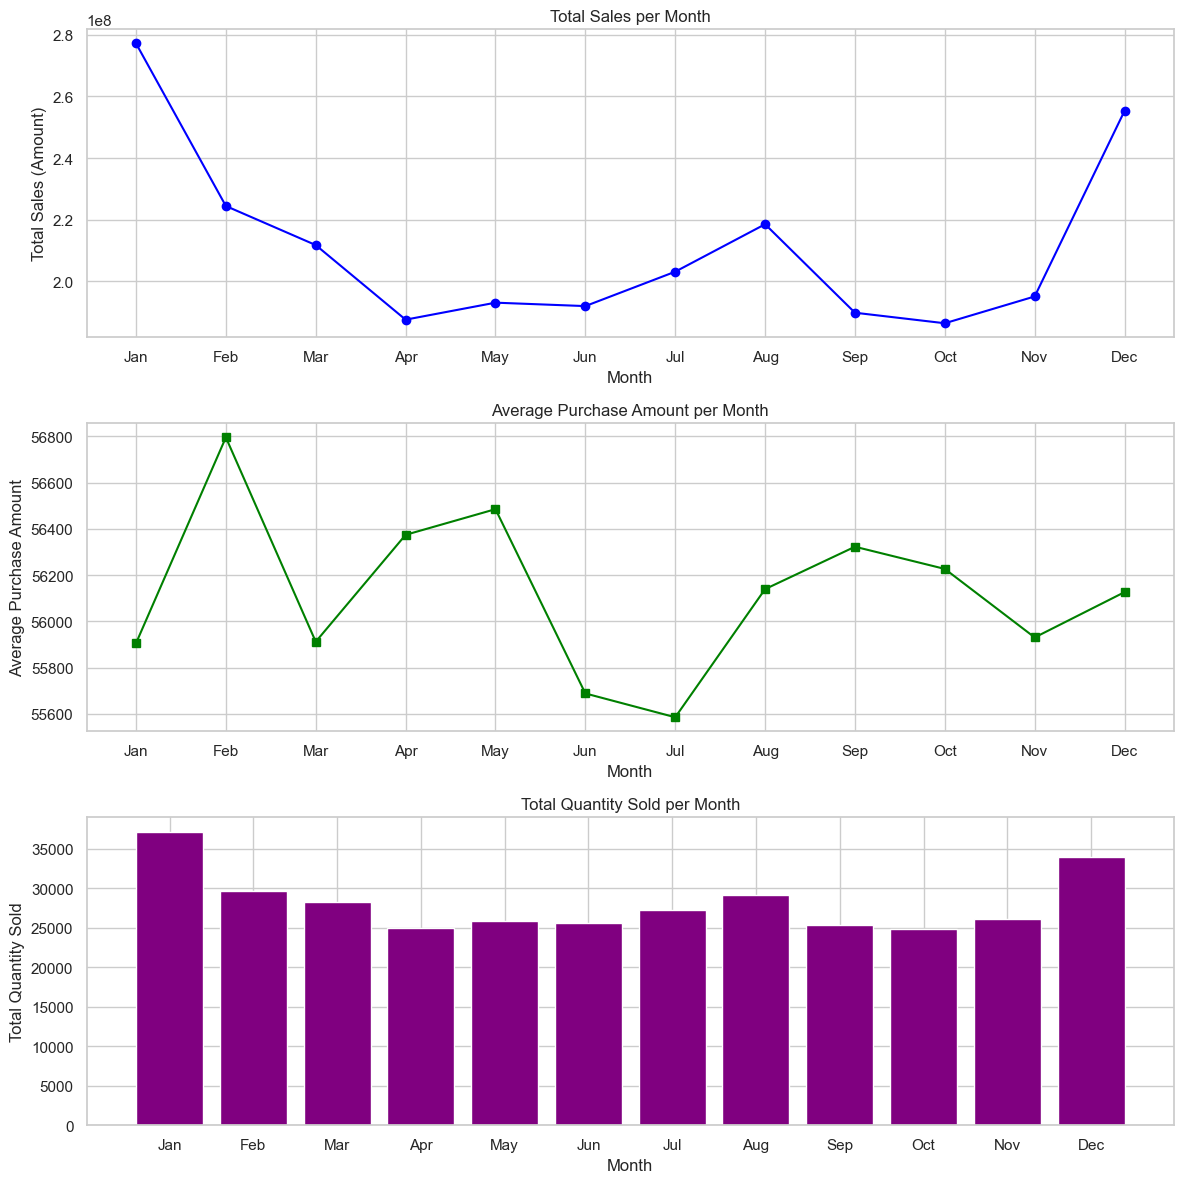

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is already loaded as a DataFrame

# Create subplots for Monthly Sales Analysis
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# 1. Total Sales per Month
monthly_sales = data.groupby('month')['amount'].sum()
axes[0].plot(monthly_sales.index, monthly_sales.values, marker='o', color='blue')
axes[0].set_title('Total Sales per Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Sales (Amount)')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# 2. Average Purchase Amount per Month
avg_purchase_per_month = data.groupby('month')['amount'].mean()
axes[1].plot(avg_purchase_per_month.index, avg_purchase_per_month.values, marker='s', color='green')
axes[1].set_title('Average Purchase Amount per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Purchase Amount')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# 3. Total Quantity Sold per Month
total_quantity_per_month = data.groupby('month')['quantity'].sum()
axes[2].bar(total_quantity_per_month.index, total_quantity_per_month.values, color='purple')
axes[2].set_title('Total Quantity Sold per Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Total Quantity Sold')
axes[2].set_xticks(range(1, 13))
axes[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust layout for better spacing
plt.tight_layout()

# Show the subplot
plt.show()


**Total Sales per Month:** Displays the total sales in each month to identify peak periods.  
**Average Purchase Amount per Month:** Shows the average amount spent per purchase in each month.  
**Total Quantity Sold per Month:** Highlights the total number of units sold in each month.

**Conclusion:**  
The dataset provides valuable insights into customer purchasing behavior, category performance, and sales trends over time. By leveraging these insights, the business can optimize marketing efforts, adjust pricing strategies, manage inventory more effectively, and tailor product offerings to both genders, ultimately driving growth and profitability.